In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
housing_df = pd.read_csv("Dataset19-Housing_Price_data.csv")
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
housing_df.shape

(545, 13)

In [7]:
housing_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
housing_df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [11]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
housing_df.duplicated().any()

False

In [15]:
housing_df.isnull().any()
housing_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [17]:
cat_features = housing_df.select_dtypes(include= 'object').columns
cat_features

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [19]:
num_features = housing_df.select_dtypes(exclude= 'object').columns
num_features

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [21]:
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [23]:
housing_df[housing_df['price'] == housing_df['price'].max()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


In [25]:
housing_df[housing_df['area'] == housing_df['area'].max()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished


In [27]:
for col in cat_features:
    print(housing_df[col].value_counts())
    print("****************************************************")
    print("")

mainroad
yes    468
no      77
Name: count, dtype: int64
****************************************************

guestroom
no     448
yes     97
Name: count, dtype: int64
****************************************************

basement
no     354
yes    191
Name: count, dtype: int64
****************************************************

hotwaterheating
no     520
yes     25
Name: count, dtype: int64
****************************************************

airconditioning
no     373
yes    172
Name: count, dtype: int64
****************************************************

prefarea
no     417
yes    128
Name: count, dtype: int64
****************************************************

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64
****************************************************



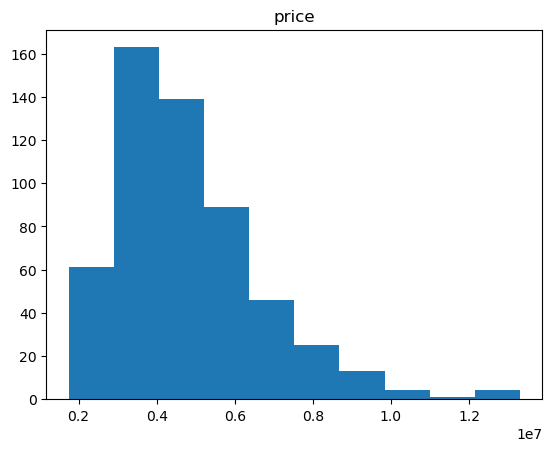

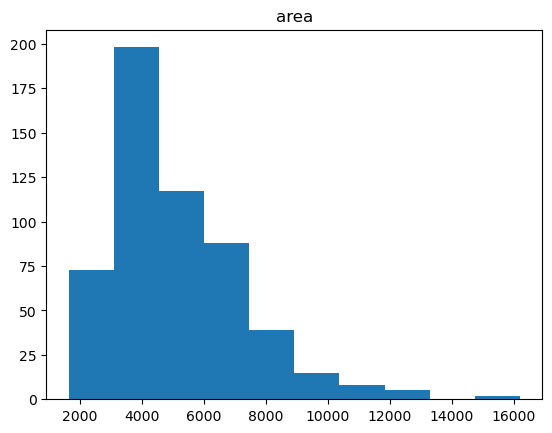

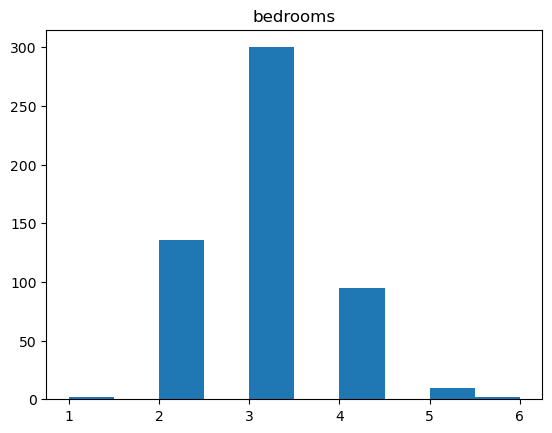

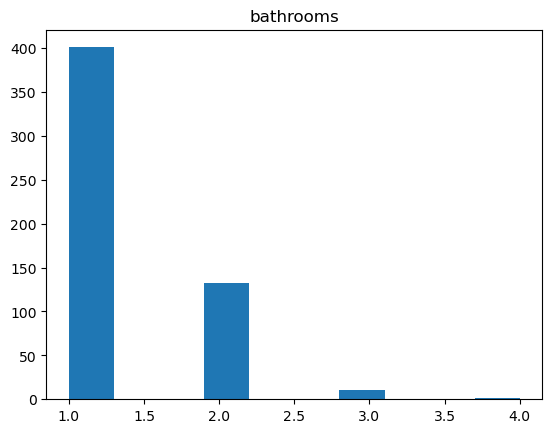

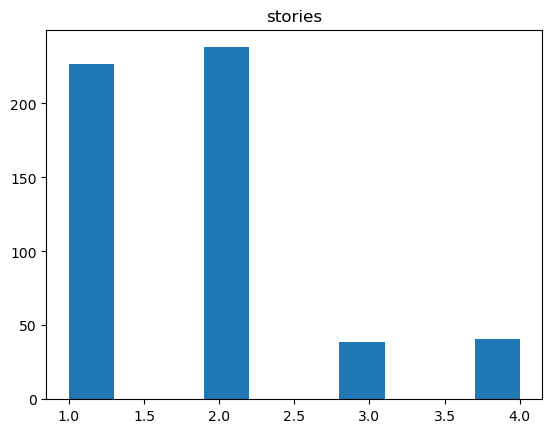

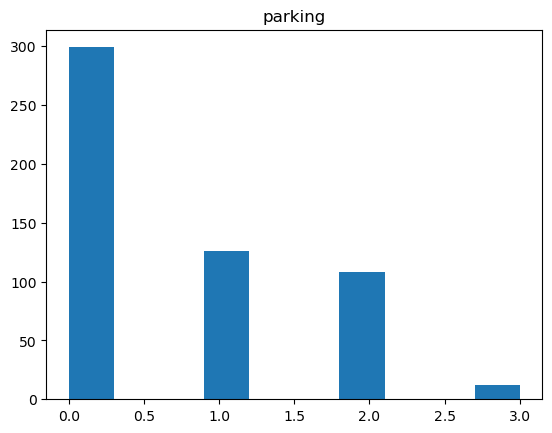

In [29]:
for col in num_features:
    plt.hist(housing_df[col])
    plt.title(col)
    plt.show()

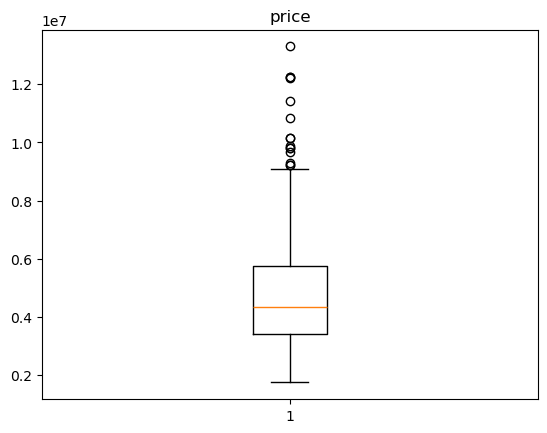

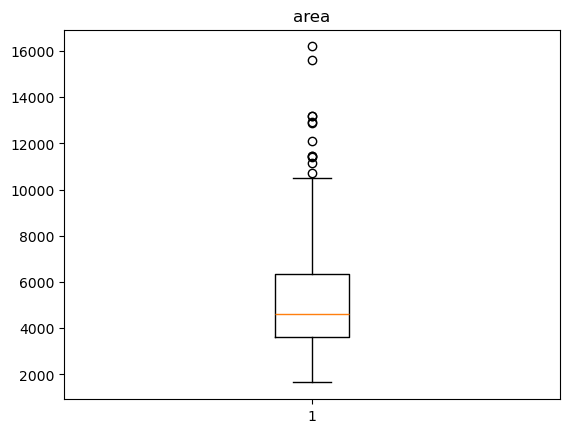

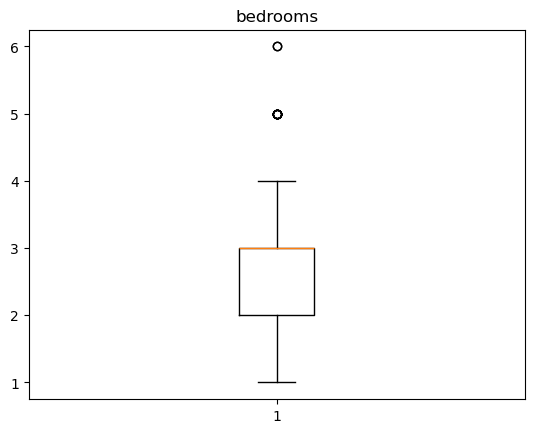

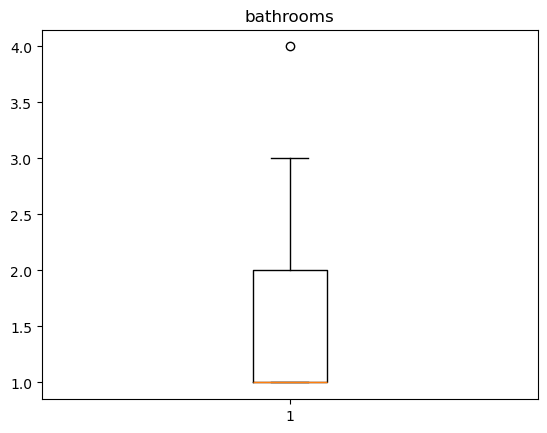

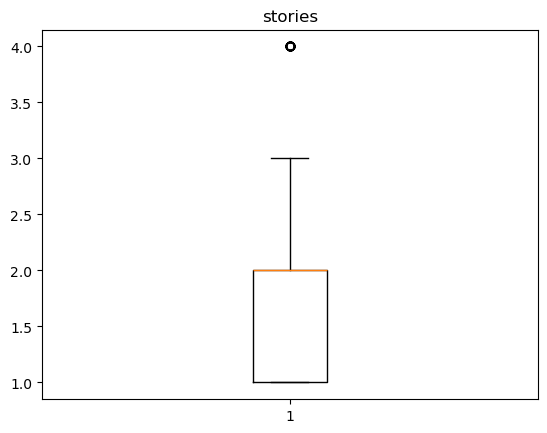

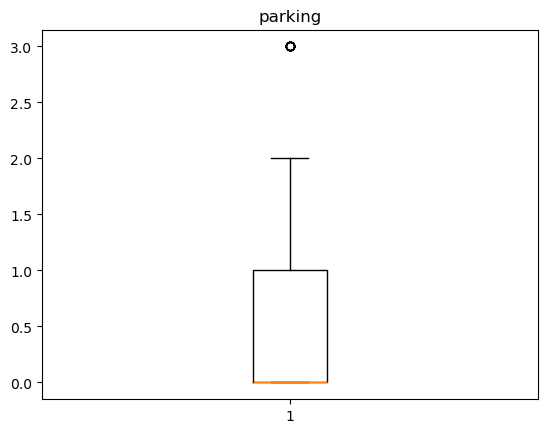

In [30]:
for col in num_features:
    plt.boxplot(housing_df[col])
    plt.title(col)
    plt.show()

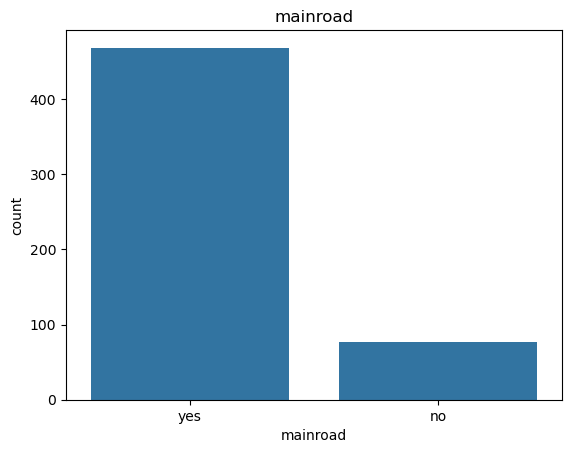

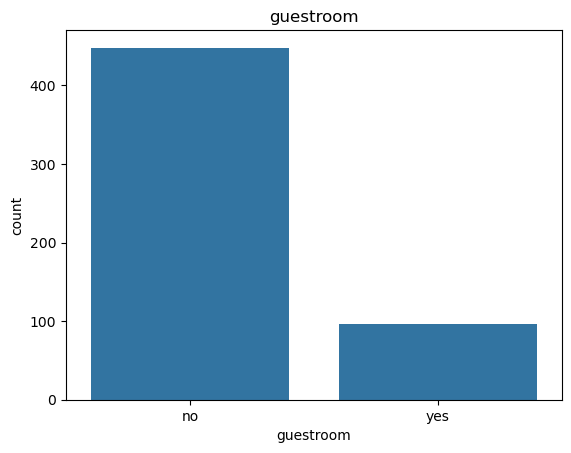

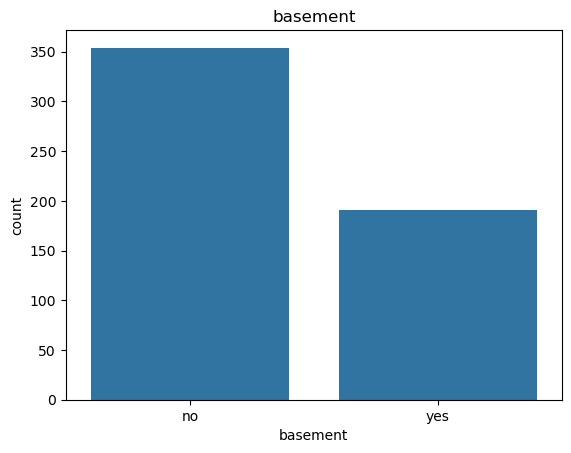

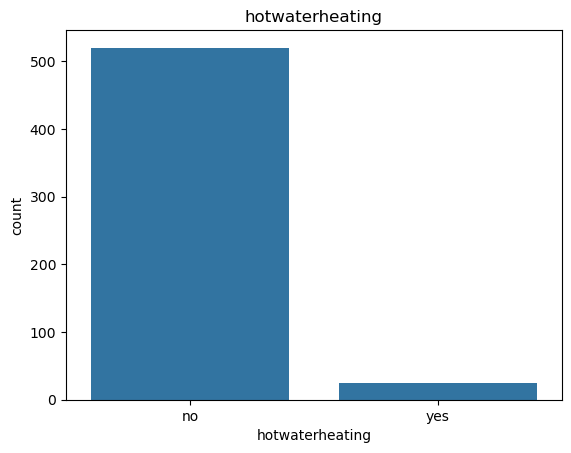

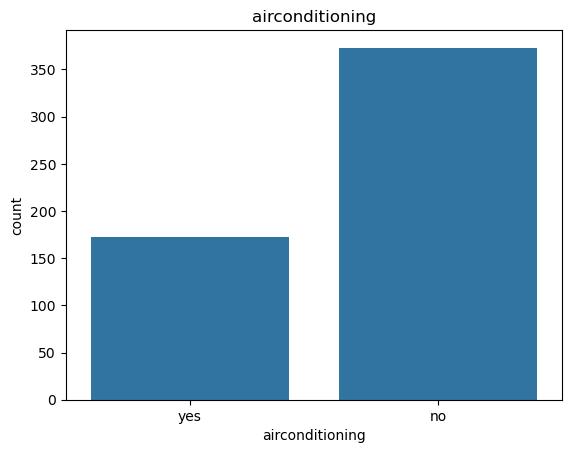

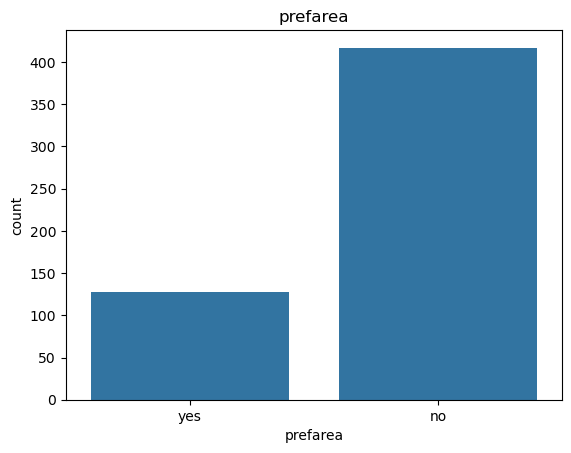

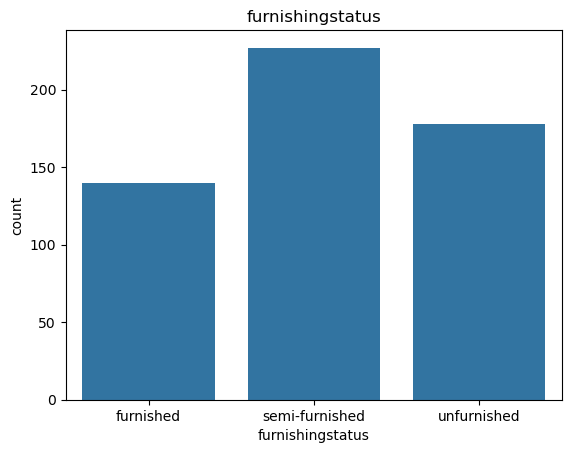

In [32]:
for col in cat_features:
    sns.countplot(x=housing_df[col])
    plt.title(col)
    plt.show()

In [33]:
corr_matrix = housing_df[num_features].corr()
corr_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

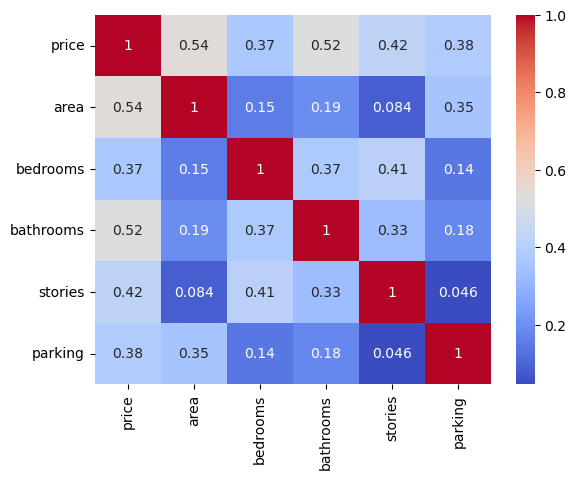

In [35]:
sns.heatmap(corr_matrix,annot = True , cmap='coolwarm' )

<Axes: xlabel='price', ylabel='area'>

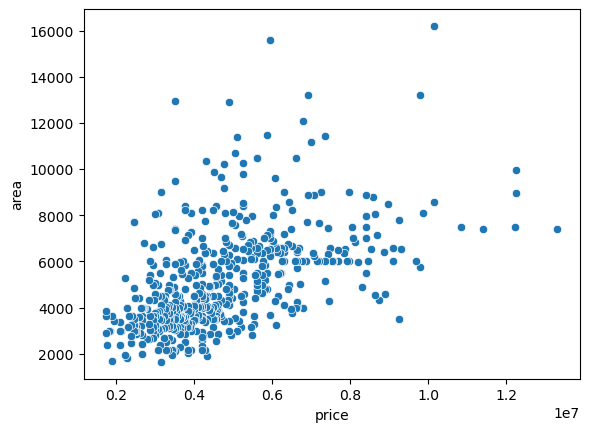

In [36]:
sns.scatterplot(x = housing_df['price'], y= housing_df['area'])


In [37]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [40]:
X = housing_df.drop('price', axis = 1)
y = housing_df['price']

In [42]:
cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in cols:
    X[col] = X[col].apply(lambda x: 1 if x == 'yes' else 0)

X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [47]:
def furnish_status(x):
    if x == 'furnished':
        return 2
    elif x == 'semi-furnished':
        return 1
    else :
        return 0

X['furnishingstatus'] = X['furnishingstatus'].apply(lambda x : furnish_status(x))
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2


In [49]:
features_to_scale = ['area' , 'bedrooms' , 'bathrooms' , 'stories' , 'parking']

In [51]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [52]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

In [55]:
for col in features_to_scale:
    print(col)
    X[[col]] = minmax_scaler.fit_transform(X[[col]])

area
bedrooms
bathrooms
stories
parking


In [57]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,2
1,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,2
2,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1
3,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,2
4,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,2


In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state=42)

In [61]:
x_train.shape,x_test.shape

((436, 12), (109, 12))

In [63]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [79]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [81]:
from sklearn.metrics import r2_score,mean_squared_error

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_lr = linear_reg_model.predict(X_test)
score = round(r2_score(y_test, y_pred_lr) * 100, 2)
mse = round(mean_squared_error(y_test, y_pred_lr), 2)
# Print the results
print(" ---------Linear Regression Model-----------------")
print('R2_Squared =', score, '%')
print('Mean Squared Error (MSE) = ', mse)

 ---------Linear Regression Model-----------------
R2_Squared - 64.95 %
Mean Squared Error (MSE) =  1771751116594.04


In [85]:



# Initialize models
lr = LinearRegression()
rr = Ridge()
ls = Lasso()
dcr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
knr = KNeighborsRegressor()
svr = SVR()

# List of models
model_list = [lr, rr, ls, dcr, rfr, etr, knr, svr]

# Iterate over models and evaluate
for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = round(r2_score(y_test, y_pred) * 100, 2)
    mse = round(mean_squared_error(y_test, y_pred), 2)
    print(f"Model: {model.__class__.__name__}")
    print('R2 Squared =', score, '%')
    print('Mean Squared Error (MSE) =', mse)
    print("")


Model: LinearRegression
R2 Squared = 64.95 %
Mean Squared Error (MSE) = 1771751116594.04

Model: Ridge
R2 Squared = 64.88 %
Mean Squared Error (MSE) = 1774939526467.26

Model: Lasso
R2 Squared = 64.95 %
Mean Squared Error (MSE) = 1771757186251.13

Model: DecisionTreeRegressor
R2 Squared = 44.5 %
Mean Squared Error (MSE) = 2805268655963.3

Model: RandomForestRegressor
R2 Squared = 60.87 %
Mean Squared Error (MSE) = 1977880254751.17

Model: ExtraTreesRegressor
R2 Squared = 61.27 %
Mean Squared Error (MSE) = 1957588581856.59

Model: KNeighborsRegressor
R2 Squared = 50.14 %
Mean Squared Error (MSE) = 2520192976603.67

Model: SVR
R2 Squared = -10.16 %
Mean Squared Error (MSE) = 5567941425586.94



In [87]:

from sklearn.model_selection import cross_val_score

# Assuming lr, rr, ls, dcr, rfr, etr, knr, svr are defined as your models
models = [lr, rr, ls, dcr, rfr, etr, knr, svr]
features = x_train
labels = y_train
CV = 5
accu_list = []  # Accuracy List
ModelName = []  # Model Name List

# Check shapes and ensure consistency
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

# Ensure both features and labels are of the same length
if len(features) != len(labels):
    min_length = min(len(features), len(labels))
    features = features[:min_length]
    labels = labels[:min_length]

# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='r2', cv=CV)
    accu_list.append(accuracies.mean() * 100)
    ModelName.append(model_name)

# Create a DataFrame to display results
model_acc_df = pd.DataFrame({"Model": ModelName, "Cross_Val_Accuracy": accu_list})
print(model_acc_df)


Features shape: (436, 12)
Labels shape: (436,)
                   Model  Cross_Val_Accuracy
0       LinearRegression           64.694529
1                  Ridge           64.869945
2                  Lasso           64.694567
3  DecisionTreeRegressor           19.371742
4  RandomForestRegressor           60.159712
5    ExtraTreesRegressor           59.540796
6    KNeighborsRegressor           47.205017
7                    SVR           -6.493356


## from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Example MinMaxScaler initialization (replace with your trained scaler)
minmax_scaler = MinMaxScaler()

# Get user input
br = int(input('Enter the Number of Bedrooms: '))
btrm = int(input('Enter the Number of Bathrooms: '))
st = int(input('Enter the Number of Storey: '))
ar = int(input('Enter the Area of the house: '))
mr = int(input('Enter Mainroad is available (yes-1/ no-0): '))
gr = int(input('Guest Room Available (yes-1/ no-0): '))
bs = int(input('Basement (yes-1/ no-0): '))
hw = int(input('Hot Water Heating Available (yes-1/ no-0): '))
ac = int(input('Air Conditioning Available (yes-1/ no-0): '))
prk = int(input('Number of Parking: '))
pf = int(input('Pref Area Available (yes-1/ no-0): '))
fr = int(input("Enter Furnishing Status (furnished=2, semi-furnished=1, unfurnished=0): "))

# Transform inputs
br1 = minmax_scaler.transform([[br]])[0][0]
btrm1 = minmax_scaler.transform([[btrm]])[0][0]
st1 = minmax_scaler.transform([[st]])[0][0]
ar1 = minmax_scaler.transform([[ar]])[0][0]
mr1 = minmax_scaler.transform([[mr]])[0][0]
gr1 = minmax_scaler.transform([[gr]])[0][0]
bs1 = minmax_scaler.transform([[bs]])[0][0]
hw1 = minmax_scaler.transform([[hw]])[0][0]
ac1 = minmax_scaler.transform([[ac]])[0][0]
prk1 = minmax_scaler.transform([[prk]])[0][0]
pf1 = minmax_scaler.transform([[pf]])[0][0]
fr1 = minmax_scaler.transform([[fr]])[0][0]

# Prepare the input for the model
input_features = np.array([[br1, btrm1, st1, ar1, mr1, gr1, bs1, hw1, ac1, prk1, pf1, fr1]])

print("Scaled Input Features:")
print(input_features)


In [91]:
# Assuming `minmax_scaler` was already fitted with 12 features:
# Collect all inputs into a single array
br = int(input('Enter the Number of Bedrooms: '))
br1=minmax_scaler.transform([[br]])[0][0]
btrm = int(input('Enter the Number of Bathrooms: '))
btrm1=minmax_scaler.transform([[btrm]])[0][0]
st = int(input('Enter the Number of Storey: '))
st1=minmax_scaler.transform([[st]])[0][0]
ar = int(input('Enter the Area of the house: '))
ar1=minmax_scaler.transform([[ar]])[0][0]
mr = int(input('Enter Mainroad is available (yes-1/ no-0): '))

gr = int(input('Guest Room Available (yes-1/ no-0): '))

bs = int(input('Basement (yes-1/ no-0): '))

hw = int(input('Hot Water Heating Available (yes-1/ no-0): '))
ac = int(input('Air Conditioning Available (yes-1/ no-0): '))
prk = int(input('Number of Parking: '))
prk1=minmax_scaler.transform([[prk]])[0][0]
pf = int(input('Pref Area Available (yes-1/ no-0): '))
fr = int(input('Enter Furnishing Status (furnished=2, semi-furnished=1, unfurnished=0): '))



Enter the Number of Bedrooms:  2


E:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Enter the Number of Bathrooms:  2


E:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Enter the Number of Storey:  2


E:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Enter the Area of the house:  1200


E:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Enter Mainroad is available (yes-1/ no-0):  1
Guest Room Available (yes-1/ no-0):  0
Basement (yes-1/ no-0):  0
Hot Water Heating Available (yes-1/ no-0):  1
Air Conditioning Available (yes-1/ no-0):  1
Number of Parking:  2


E:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Pref Area Available (yes-1/ no-0):  0
Enter Furnishing Status (furnished=2, semi-furnished=1, unfurnished=0):  2


In [93]:
house_data = (ar1, br1, btrm1, st1, mr, gr, bs, hw, ac, prk1, pf, fr)
house_data_arr = np.array(house_data)
house_data_reshape = house_data_arr.reshape(1, -1)
house_price = lr.predict(house_data_reshape)
print("House Price predicted by Linear regression Model Rs =", house_price[0])

House Price predicted by Linear regression Model Rs = 1380464365.2189736


E:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [95]:

import pickle


In [97]:

filename = 'House_Price_Trained_Model.sav'
pickle.dump (lr, open(filename, 'wb'))

In [99]:
loaded_model = pickle.load(open('House_Price_Trained_Model.sav', 'rb'))


In [112]:

# Example data with correct number of features (replace with actual feature names)
house_data = (1200, 2, 2, 3, 1, 1, 1, 1, 1, 2, 1, 2)  # Adjust as per actual features

# Convert to NumPy array and reshape for prediction
house_data_arr = np.array(house_data)
house_data_reshape = house_data_arr.reshape(1, -1)
house_price=loaded_model.predict(house_data_reshape)


print(f"Predicted House Price: {house_price[0]}")


Predicted House Price: 4135659164.259019


E:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
